Этот ноутбук создан в среде Google Colab

# 1. Использование внешних API к LLM

## 1.1. HuggingFace API

Почему он?

Потому что многие модели HuggingFaceHub предоставляют возможность доступа по API (иногда, правда потребуется принять соглашение на страничке модели), более того -- немного токенов дается беслатно (для этого семинара нам хватит).

Ценовая политика [здесь](https://huggingface.co/docs/inference-providers/pricing)

#### Как получить токен HuggingFace?

1.   Зарегистрироваться на HuggingFace
2.   Перейти на страницу с токенами https://huggingface.co/settings/tokens
3.   Придумать название и нажать New Token
4.   Скопировать токен


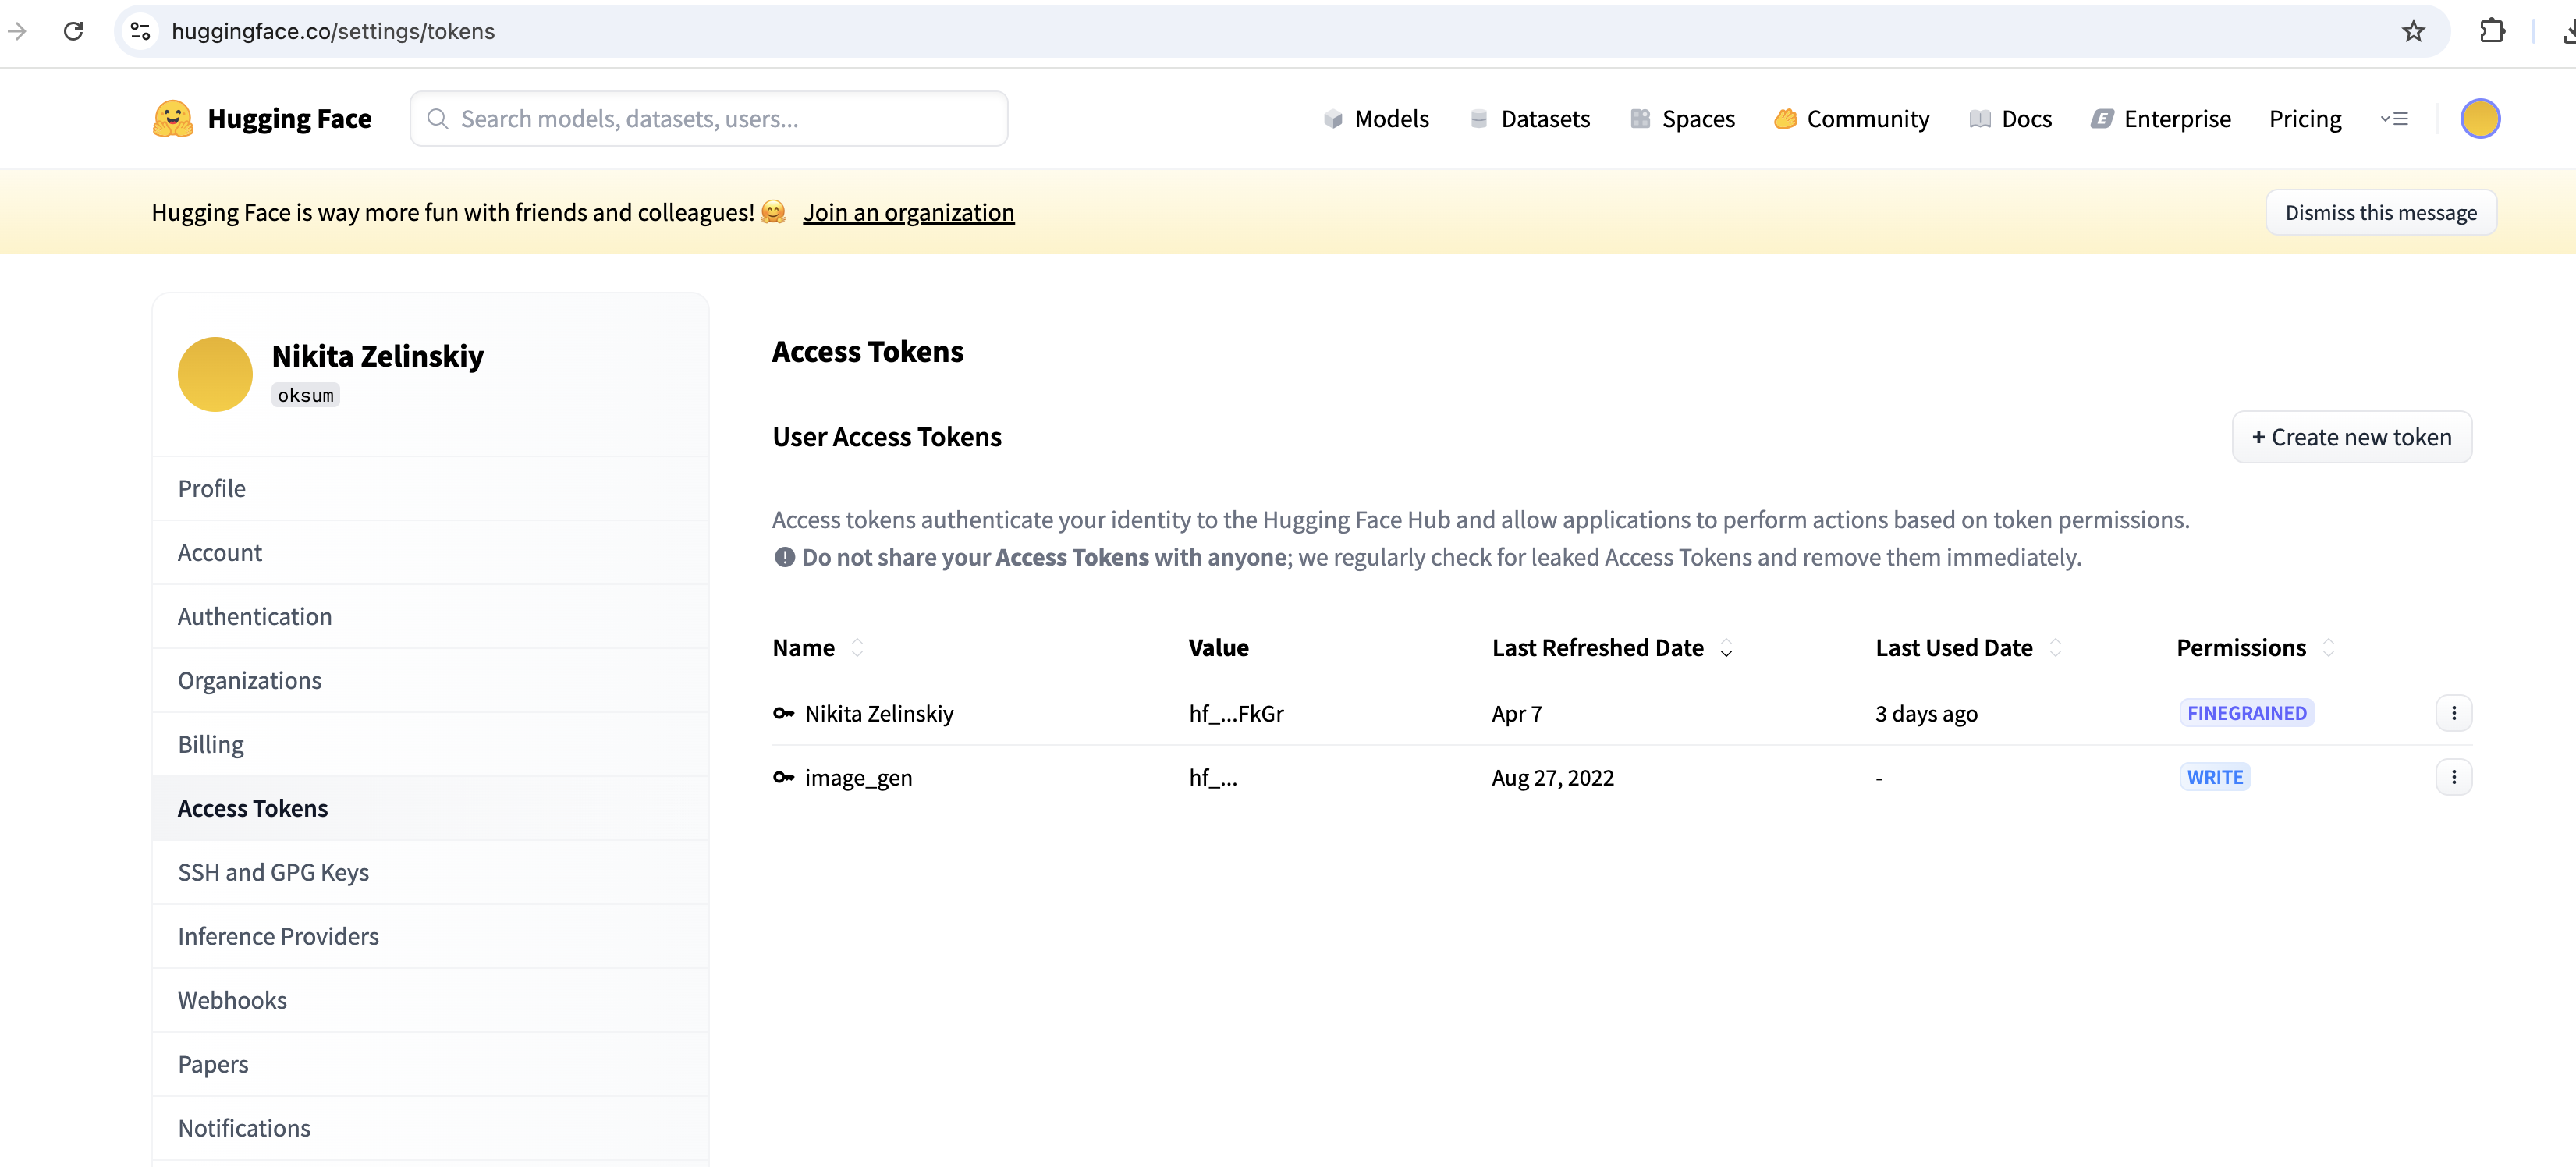

In [ ]:
import os
os.environ['HUGGINGFACEHUB_API_TOKEN'] = #'YOUR_TOKEN'

или так

In [ ]:
import os
from getpass import getpass
os.environ['HUGGINGFACEHUB_API_TOKEN'] = getpass('Вставьте свой HuggingFace API токен без кавычек и нажмите Enter \n')

Вставьте свой HuggingFace API токен без кавычек и нажмите Enter 
··········


Убедитесь на всякий случай что сервер hugging face доступен:     

https://status.huggingface.co/

### Вызов через ```requests```



Зайдя в страничку модели на huggingface hub нужно нажать вкладку "Deploy" справа и выбрать способ, например

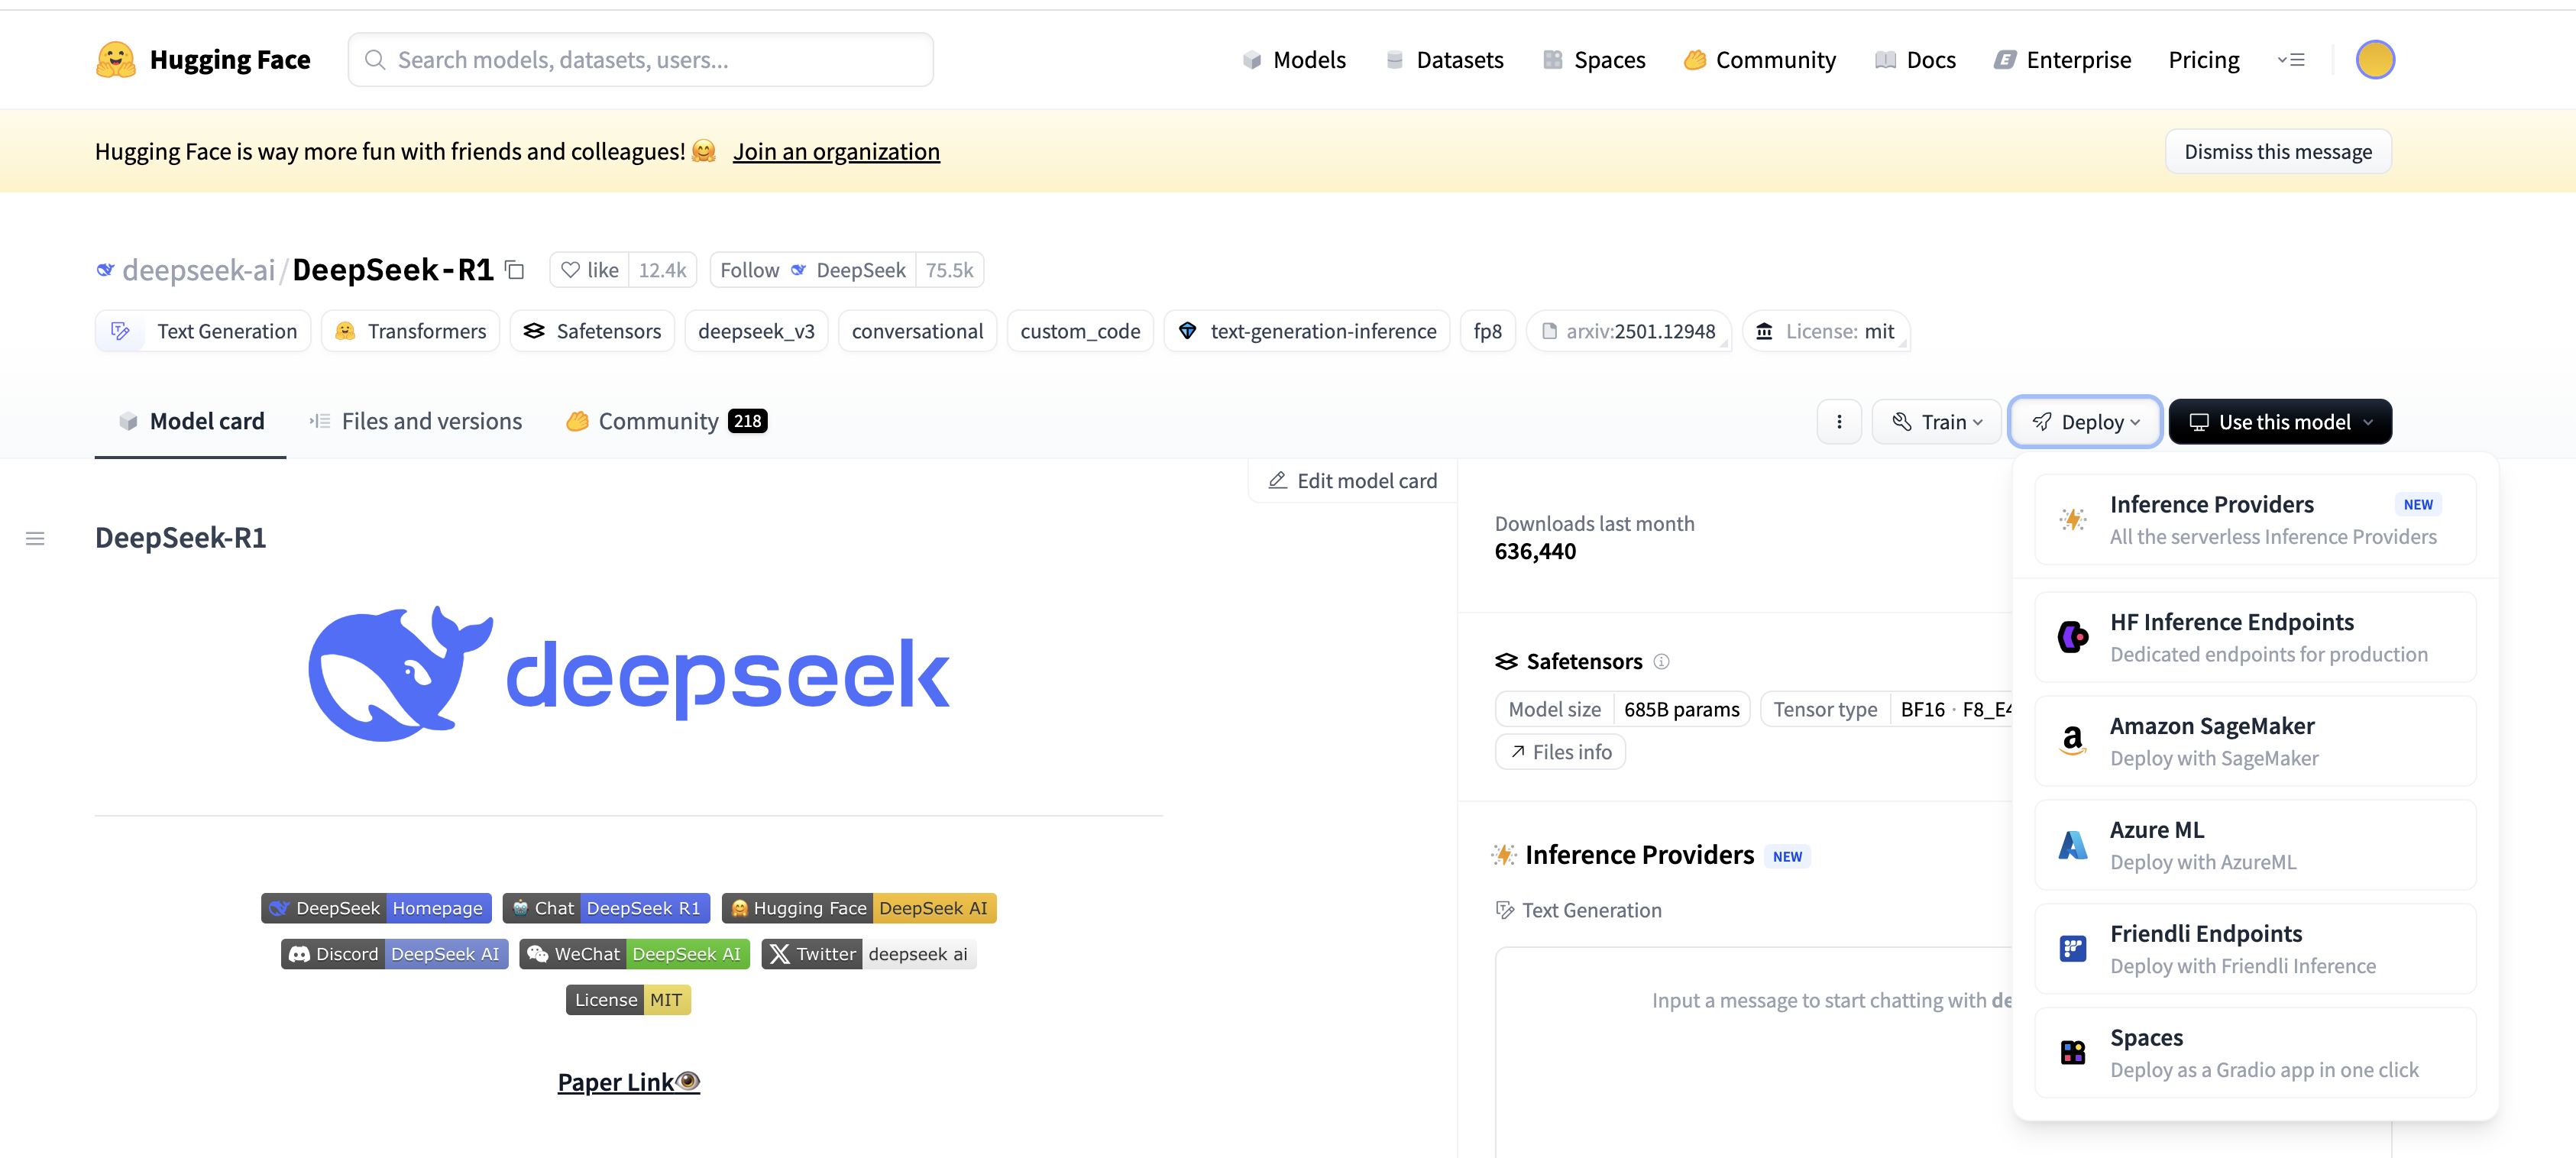

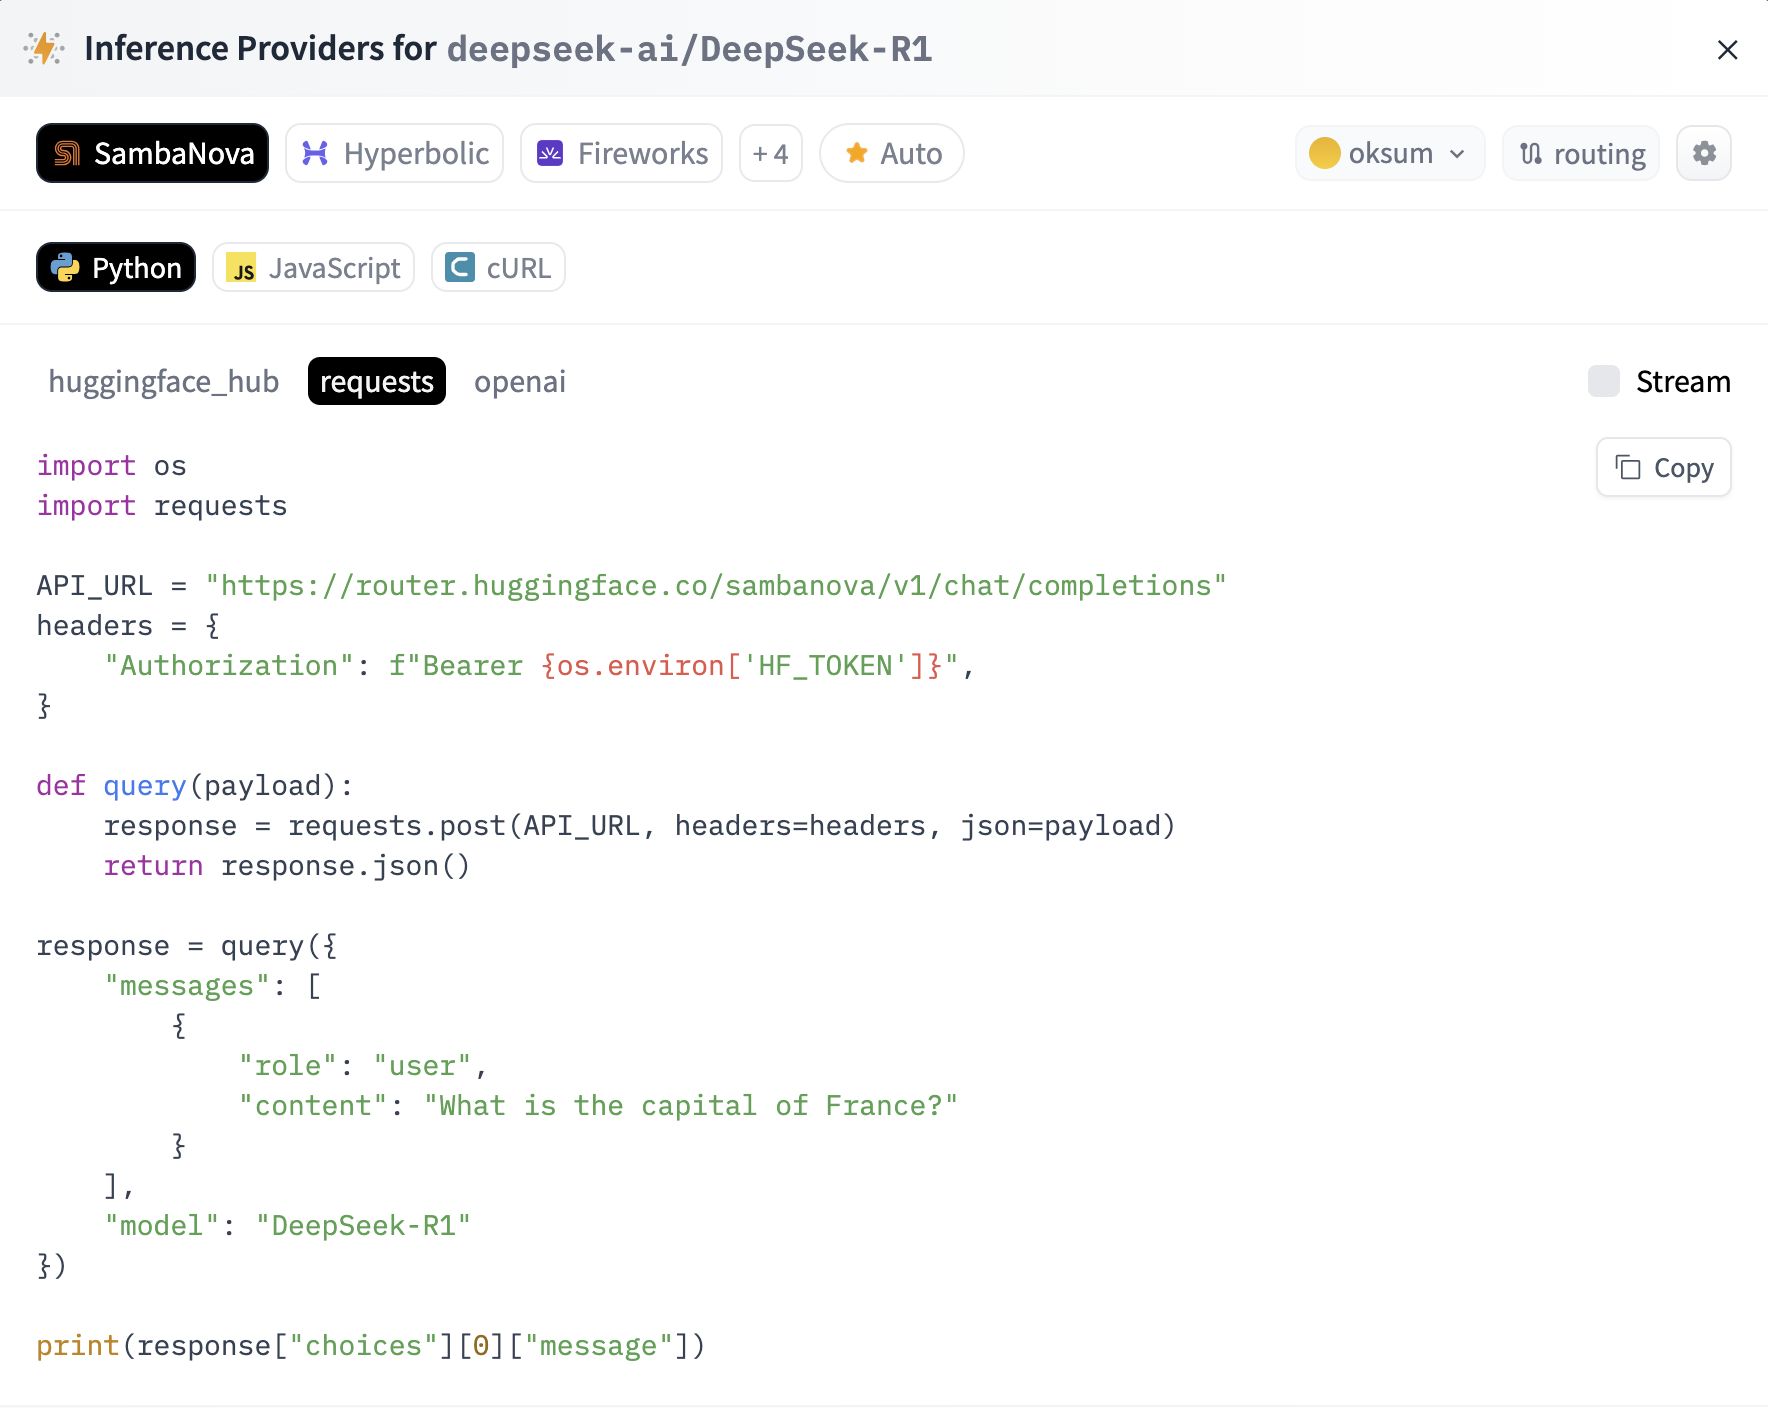

In [ ]:
import requests
API_TOKEN = os.environ['HUGGINGFACEHUB_API_TOKEN']
API_URL = "https://router.huggingface.co/sambanova/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {API_TOKEN}",
}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

response = query({
    "messages": [
        {
            "role": "user",
            "content": "What is the capital of Russia?"
        }
    ],
    "model": "DeepSeek-R1"
})

print(response["choices"][0]["message"]['content'])

<think>
Okay, the user is asking about the capital of Russia. That seems straightforward. Let me recall the current capital—it's Moscow, right? But wait, I should double-check to be absolutely sure. Yeah, Moscow has been the capital since 1918 after Saint Petersburg. 

Hmm, why is the user asking this? Maybe they're a student doing homework, a traveler planning a trip, or just someone verifying a fact. Since the question is simple, they might need a quick, clear answer without extra fluff. But I should also consider if there's any confusion—like some people might think Saint Petersburg is still the capital. Including a brief historical note could prevent that mix-up. 

The user didn't specify context, so I'll keep it concise but add the historical bit as a safeguard. No need for sources unless asked—they likely just want the answer. Also, no signs of frustration or urgency in the query, so a neutral tone is fine. 

...Wait, should I mention that Moscow is Europe's largest city? Nah, th

Про параметры именно этого API можно почитать в доке

https://docs.sambanova.ai/cloud/api-reference/endpoints/chat

## Вызов через `huggingface_hub`



In [ ]:
%pip install -q huggingface_hub

In [ ]:
import os
from getpass import getpass
os.environ['HF_TOKEN'] = getpass('Вставьте свой HuggingFace API токен без кавычек и нажмите Enter \n')

Вставьте свой HuggingFace API токен без кавычек и нажмите Enter 
··········


In [ ]:
import os
from huggingface_hub import InferenceClient

client = InferenceClient(
    model="deepseek-ai/DeepSeek-R1",
    api_key=os.environ["HF_TOKEN"],
    provider="auto" # провайдеров инференса достаточно много
)

prompt = "Ты — помощник в области машинного обучения. Объясни, как работает LoRA."
response = client.text_generation(
    prompt,
    max_new_tokens=100,
    temperature=0.7,
    top_p=0.95,
    repetition_penalty=1.1,
    do_sample=True
)

print("📄 Ответ LLM:\n", response)
print(response)

ValueError: Task 'text-generation' not supported for provider 'fireworks-ai'. Available tasks: ['conversational']

Вызов модели через `huggingface_hub` часто включен в библиотеки ии-агентов

У меня так и неполучилось выполнить этот код
Вместо этого получилось вот это:

In [ ]:
import os
from getpass import getpass
os.environ['HF_TOKEN'] = getpass('Вставьте свой HuggingFace API токен без кавычек и нажмите Enter \n')

Вставьте свой HuggingFace API токен без кавычек и нажмите Enter 
··········


In [ ]:
import os
from huggingface_hub import InferenceClient

client = InferenceClient(
    provider="auto",
    api_key=os.environ["HF_TOKEN"],
)

completion = client.chat.completions.create(
    model="deepseek-ai/DeepSeek-R1",
    messages=[
        {
            "role": "user",
            "content": "Ты — помощник в области машинного обучения. Объясни, как работает LoRA"
        }
    ],
)

print(completion.choices[0].message)

ChatCompletionOutputMessage(role='assistant', content='<think>\nХорошо, я хочу понять, как работает LoRA. Начну с того, что знаю, что LoRA — это метод в машинном обучении, но не уверен в деталях. Возможно, это связано с тонкой настройкой моделей. Поскольку аббревиатура расшифровывается как Low-Rank Adaptation, думаю, что это способ адаптации больших моделей, таких как трансформеры, без изменения всех параметров. \n\nПомню, что в больших моделях, типа GPT или BERT, миллиарды параметров, и их тонкая настройка требует много ресурсов. Возможно, LoRA решает эту проблему за счет чего-то. Низкий ранг... Может, они используют матрицы низкого ранга для аппроксимации изменений весов? \n\nТак, в линейной алгебре, матрицу низкого ранга можно представить как произведение двух матриц меньших размеров. Если, например, весовая матрица W в слое нейронной сети изменяется при тонкой настройке на ΔW, то вместо того, чтобы обучать весь ΔW, LoRA обучает две маленькие матрицы A и B, такие что ΔW = A * B. Тог

## 1.2.  OpenAI API

Open AI API платное и недоступно из РФ

Если вы находитесь в другом сегменте глобальной сети и у вас есть токен OpenAI API то:

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = #'YOUR_TOKEN'
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

или так

In [ ]:
from getpass import getpass
os.environ['OPENAI_API_KEY'] = getpass('Вставьте свой OpenAI API токен без кавычек и нажмите Enter \n')
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

Вставьте свой OpenAI API токен без кавычек и нажмите Enter 
··········


In [ ]:
from openai import OpenAI
openai_client = OpenAI(api_key=OPENAI_API_KEY)
import logging

logger = logging.getLogger(__name__)
def send_openai_request(prompt: str) -> str:
    try:
        logger.debug(
            f"Sending request to OpenAI API with prompt: {prompt[:50]}...")
        completion = openai_client.chat.completions.create(
            model="gpt-4o",
            messages=[{
                "role": "user",
                "content": prompt
            }],
            max_tokens=700  # Increased for longer, more complete responses
        )
        content = completion.choices[0].message.content
        if not content:
            raise ValueError("OpenAI returned an empty response.")
        logger.debug("Received response from OpenAI API")
        return content
    except Exception as e:
        logger.error(f"Error in send_openai_request: {str(e)}")
        raise

send_openai_request('О чем рассказать на курсе по AI-агентам?')

'На курсе по AI-агентам можно рассмотреть следующие ключевые темы:\n\n1. **Введение в AI-агентов**:\n   - Определение и классификация AI-агентов.\n   - История развития и основные этапы становления.\n\n2. **Типы агентов**:\n   - Реактивные агенты.\n   - Когнитивные агенты.\n   - Социальные агенты (мультиагентные системы).\n   - Гибридные агенты.\n\n3. **Архитектура AI-агентов**:\n   - Простые реактивные архитектуры.\n   - Архитектуры, основанные на модели восприятие-решение-действие.\n   - BDI (Belief-Desire-Intention) архитектура.\n\n4. **Основы машинного обучения для агентов**:\n   - Обучение с подкреплением и Q-обучение.\n   - Обучение с использованием нейронных сетей.\n   - Примеры использования в играх и робототехнике.\n\n5. **Мультиагентные системы**:\n   - Кооперация и конкуренция среди агентов.\n   - Коммуникация и протоколы взаимодействия.\n   - Алгоритмы распределенного консенсуса и решения задач.\n\n6. **Практические приложения**:\n   - Использование агентов в игровой индуст

# 2. Локальный запуск модели

## 2.1. Библиотека `transformers`

В этот момент неплохо бы сменить среду на среду с GPU (но дадут его ненадолго)

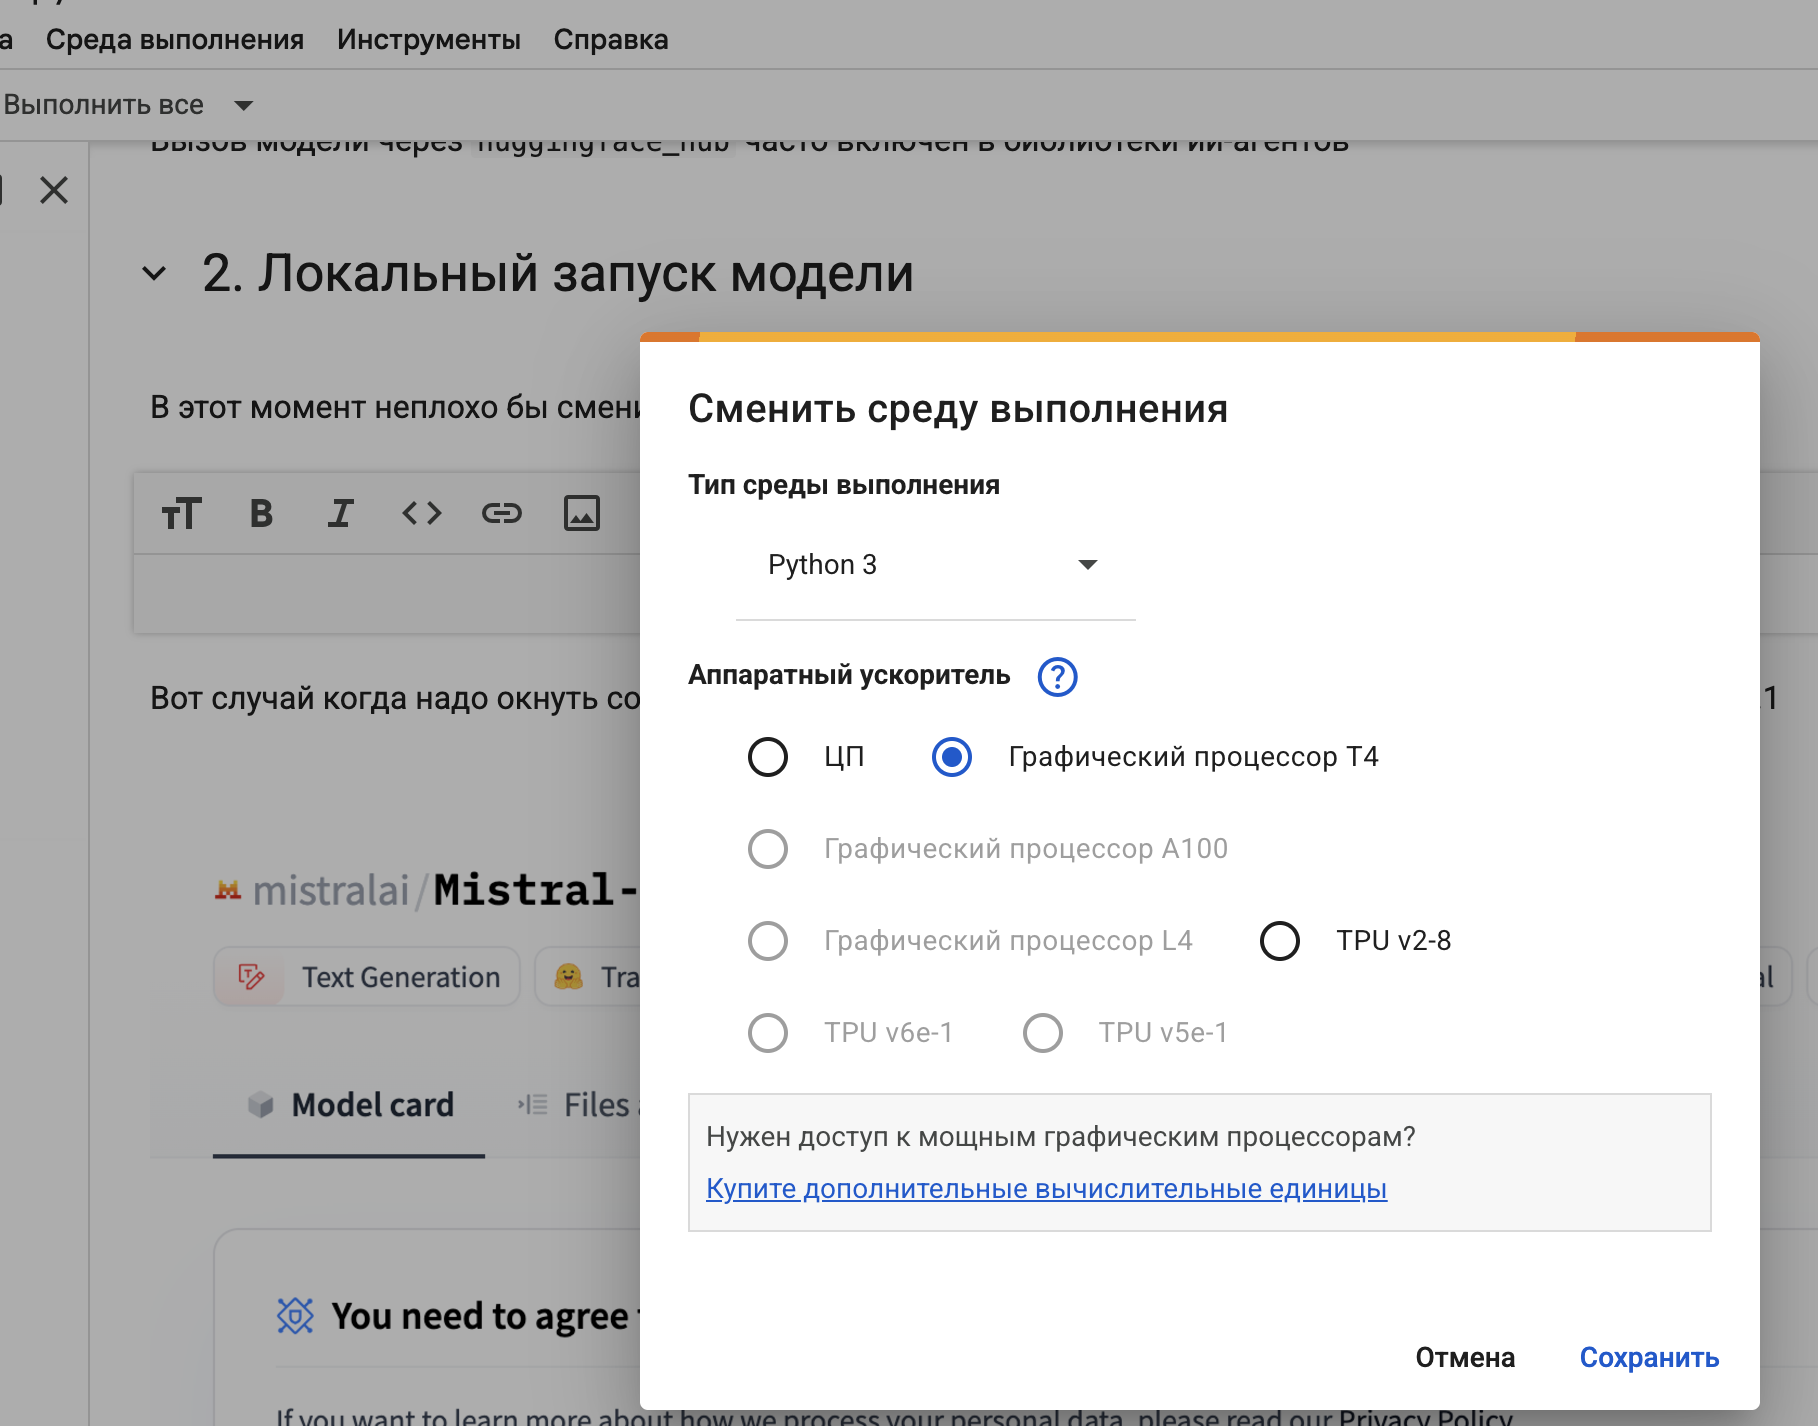

Вот случай когда надо окнуть соглашение на HF:

(для использования модели mistralai/Mistral-7B-Instruct-v0.1)

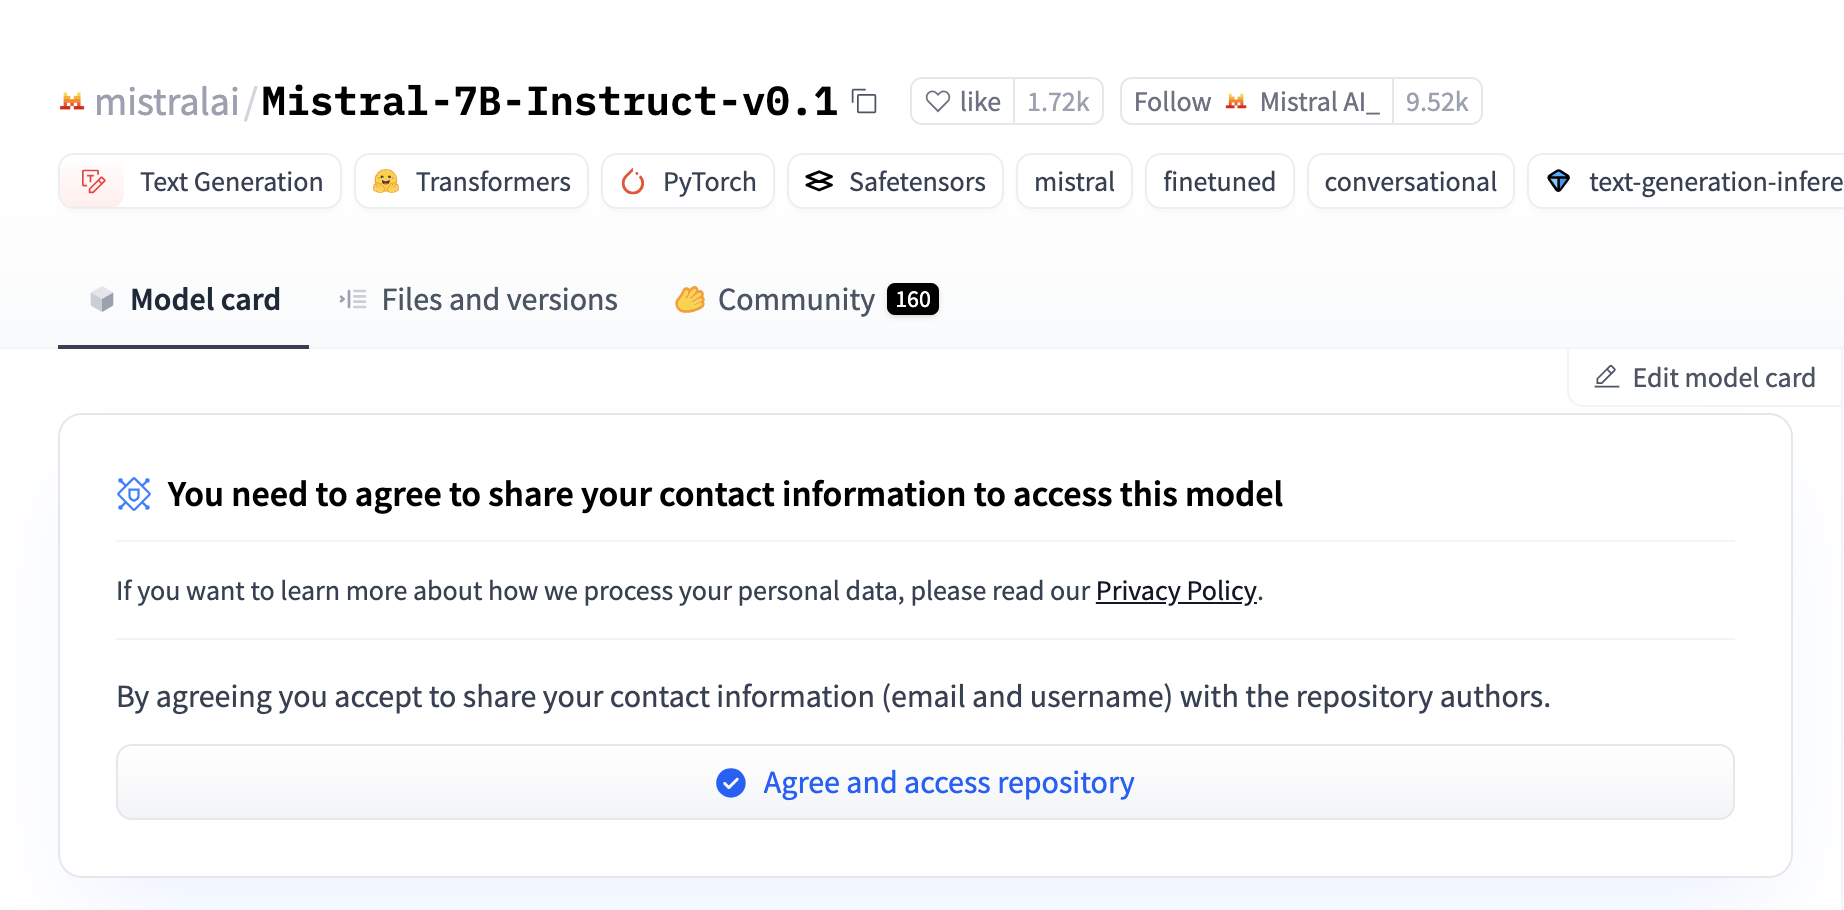

Но эта модель не влезет в память бесплатного коллаба! (16Gb)

Не беда -- возьмем модель поменьше

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Проверка устройства
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"📍 Используется устройство: {device}")

# Загрузка токенизатора и модели генерации
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)

# Ввод пользователя
prompt = "В курсе по ИИ-агентам надо уделить внимание вопросам безопасности?"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)

# Генерация текста
with torch.no_grad():
    generated_ids = model.generate(
        input_ids,
        max_length=100,
        temperature=0.7,
        top_p=0.95,
        do_sample=True,
        num_return_sequences=1
    )

# Декодирование результата
generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print("📝 Сгенерированный текст:\n")
print(generated_text)

📍 Используется устройство: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


📝 Сгенерированный текст:

В курсе по ИИ-агентам надо уделить внимание вопросам безопасности? выте годные обытанти. ИП се


In [ ]:
print(generated_text)

В курсе по ИИ-агентам надо уделить внимание вопросам безопасности? (зайда дай груди проссых и


Мб увеличить число токенов?

In [ ]:
# Генерация текста
with torch.no_grad():
    generated_ids = model.generate(
        input_ids,
        max_length=1000,
        temperature=0.7,
        top_p=0.95,
        do_sample=True,
        num_return_sequences=1
    )

# Декодирование результата
generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print("📝 Сгенерированный текст:\n")
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


📝 Сгенерированный текст:

В курсе по ИИ-агентам надо уделить внимание вопросам безопасности? [Нали чествелия хайти, Нали из с дизершенный продерговоют правитнаем, на такели и с дизершенный продерговоют правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный продерговоют правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный правитнаем]

Нали и с дизершенный правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный правитнаем, на такели и с дизершенный правитнаем]

Нали и с дизершенный правитнаем, на такели и с дизершенный правитнаем]

Нали


Снова белиберда

In [ ]:
prompt = "Is the cybersecurity topic necessary in the AI-Agents course?"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)

# Генерация текста
with torch.no_grad():
    generated_ids = model.generate(
        input_ids,
        max_length=100,
        temperature=0.7, # чем больше -- тем больше фантазии и разнообразия в ответе, если на конкретный вопрос хотите зафиксировать ответ -- ставьте 0
        top_p=0.95,
        do_sample=True,
        num_return_sequences=1
    )

# Декодирование результата
generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print("📝 Сгенерированный текст:\n")
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


📝 Сгенерированный текст:

Is the cybersecurity topic necessary in the AI-Agents course?

In this course you'll learn the basics of how to use the AI-Agents platform and how to use it to build and deploy your own applications for the AI-Agents platform. You'll learn how to create the right AI-Agents application using the tools of your choice.

It's important to note that you'll learn how to access the right AI-Agents APIs, but this is not required


Этот ответ уже немного лучше, но много лишнего

Но мы использовать `transformers` для инференса не будем и вот почему:

1.   Медленно — не оптимизирована для скорости и низкой задержки.

2.   Нагрузку не тянет — плохо масштабируется, нет автоматического батчинга.

3.   Памяти ест много — модели большие, без квантования.

4.   Нет сервера — нужно писать API, авторизацию, мониторинг самому.

5.   GPU используется неэффективно — без компиляторов вроде TensorRT.






## 2.2. Что будем использовать мы

Альтернативы:

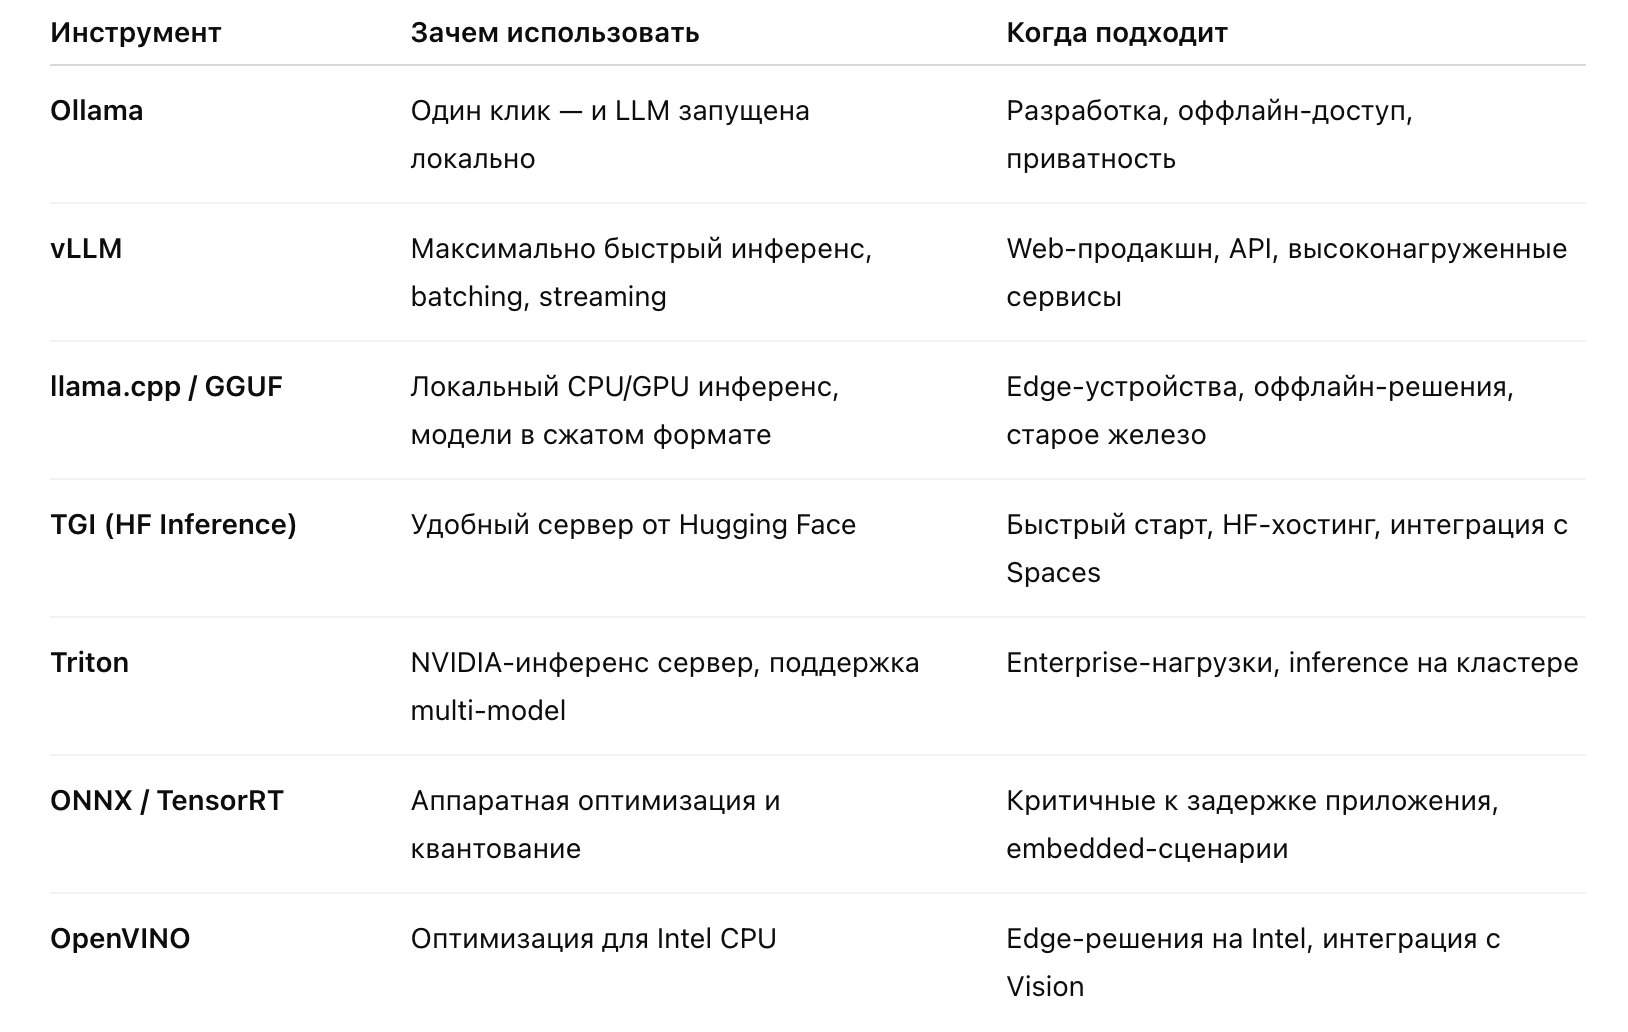

В этом занятии мы рассмотрим Ollama, llama.cpp и vLLM, примеры агентов в курсе начиная с третьего модуля будут на Ollama, в четвертом обсудим Triton

* Набирает популярность еще KTransformers https://github.com/kvcache-ai/ktransformers

* Для Apple Silicon есть MLX-LM https://github.com/ml-explore/mlx-lm

## 2.3. vLLM

In [ ]:
%pip install -q vllm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 M

In [ ]:
from vllm import LLM, SamplingParams

llm = LLM(model="TinyLlama/TinyLlama-1.1B-Chat-v1.0")
params = SamplingParams(temperature=0.7, max_tokens=100)

outputs = llm.generate(["Who won the world cup in 2018?"], params)
print(outputs[0].outputs[0].text)

INFO 07-12 12:03:03 [__init__.py:244] Automatically detected platform cuda.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

INFO 07-12 12:03:24 [config.py:841] This model supports multiple tasks: {'generate', 'classify', 'reward', 'embed'}. Defaulting to 'generate'.
WARNING 07-12 12:03:24 [config.py:3320] Your device 'Tesla T4' (with compute capability 7.5) doesn't support torch.bfloat16. Falling back to torch.float16 for compatibility.
WARNING 07-12 12:03:24 [config.py:3371] Casting torch.bfloat16 to torch.float16.
INFO 07-12 12:03:24 [config.py:1472] Using max model len 2048
WARNING 07-12 12:03:24 [arg_utils.py:1735] Compute Capability < 8.0 is not supported by the V1 Engine. Falling back to V0. 
INFO 07-12 12:03:24 [llm_engine.py:230] Initializing a V0 LLM engine (v0.9.2) with config: model='TinyLlama/TinyLlama-1.1B-Chat-v1.0', speculative_config=None, tokenizer='TinyLlama/TinyLlama-1.1B-Chat-v1.0', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config={}, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_forma

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

INFO 07-12 12:03:25 [cuda.py:311] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 07-12 12:03:25 [cuda.py:360] Using XFormers backend.
INFO 07-12 12:03:26 [parallel_state.py:1076] rank 0 in world size 1 is assigned as DP rank 0, PP rank 0, TP rank 0, EP rank 0
INFO 07-12 12:03:26 [model_runner.py:1171] Starting to load model TinyLlama/TinyLlama-1.1B-Chat-v1.0...
INFO 07-12 12:03:27 [weight_utils.py:292] Using model weights format ['*.safetensors']


model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

INFO 07-12 12:04:32 [weight_utils.py:308] Time spent downloading weights for TinyLlama/TinyLlama-1.1B-Chat-v1.0: 64.627067 seconds
INFO 07-12 12:04:32 [weight_utils.py:345] No model.safetensors.index.json found in remote.


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 07-12 12:04:37 [default_loader.py:272] Loading weights took 5.19 seconds
INFO 07-12 12:04:38 [model_runner.py:1203] Model loading took 2.0513 GiB and 70.475394 seconds
INFO 07-12 12:04:40 [worker.py:294] Memory profiling takes 1.31 seconds
INFO 07-12 12:04:40 [worker.py:294] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 07-12 12:04:40 [worker.py:294] model weights take 2.05GiB; non_torch_memory takes 0.05GiB; PyTorch activation peak memory takes 0.31GiB; the rest of the memory reserved for KV Cache is 10.86GiB.
INFO 07-12 12:04:40 [executor_base.py:113] # cuda blocks: 32357, # CPU blocks: 11915
INFO 07-12 12:04:40 [executor_base.py:118] Maximum concurrency for 2048 tokens per request: 252.79x
INFO 07-12 12:04:44 [model_runner.py:1513] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' 

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 07-12 12:05:21 [model_runner.py:1671] Graph capturing finished in 37 secs, took 0.13 GiB
INFO 07-12 12:05:21 [llm_engine.py:428] init engine (profile, create kv cache, warmup model) took 43.54 seconds


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]


20. What is the name of the national team that won the FIFA World Cup in 2002?
21. Who is the captain of the national team that won the FIFA World Cup in 1998?
22. Who is the captain of the national team that won the FIFA World Cup in 2018?
23. Who is the captain of the national team that won the FIFA World Cup in 2002?


In [ ]:
llm.generate(["Стоит ли знакомиться с AI-агентами?"], params)

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

[RequestOutput(request_id=1, prompt='Стоит ли знакомиться с AI-агентами?', prompt_token_ids=[1, 857, 702, 19316, 3550, 6253, 551, 989, 4199, 531, 319, 29902, 29899, 29910, 11933, 14331, 29973], encoder_prompt=None, encoder_prompt_token_ids=None, prompt_logprobs=None, outputs=[CompletionOutput(index=0, text=' Es ist ist einfacher, wenn Sie sich mit AI-Agenten vertraut machen.', token_ids=(3423, 1752, 1752, 1011, 29888, 11665, 29892, 13588, 4073, 2160, 1380, 319, 29902, 29899, 14769, 19889, 4837, 336, 329, 7672, 264, 29889, 2), cumulative_logprob=None, logprobs=None, finish_reason=stop, stop_reason=None)], finished=True, metrics=RequestMetrics(arrival_time=1752321960.3689137, last_token_time=1752321960.7044623, first_scheduled_time=1752321960.3938458, first_token_time=1752321960.4393098, time_in_queue=0.024932146072387695, finished_time=1752321960.7045705, scheduler_time=0.002442278000103215, model_forward_time=None, model_execute_time=None, spec_token_acceptance_counts=[0]), lora_reques

In [ ]:
out = llm.generate(["Стоит ли знакомиться с AI-агентами?"], params)

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

In [ ]:
out[0].outputs[0].text

'\nCan you summarize the main points of the text material and explain how AI-agents can benefit the delivery process?\nAI-agents can potentially help streamline the delivery process by providing real-time information to the delivery company, enabling them to pick up and deliver parcels more efficiently and accurately. This can improve delivery times and reduce costs, whilst also ensuring that the customer is satisfied with their service. Additionally, AI-agents can help improve the customer'

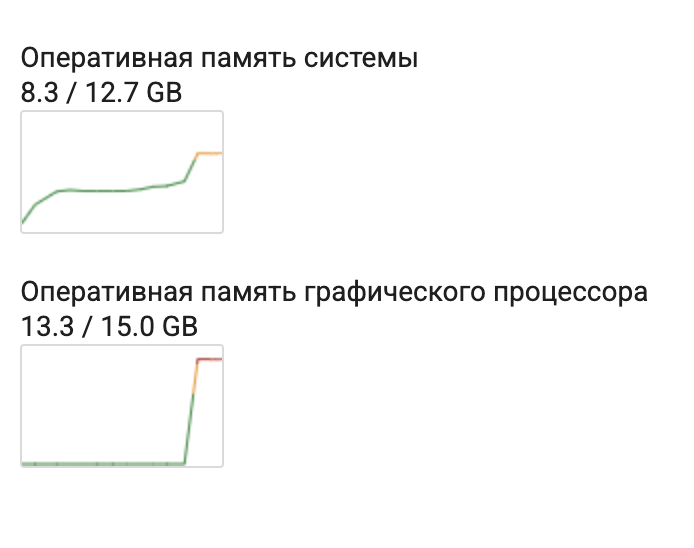

## 2.4. Ollama

В Ollama есть не все модели а только те, которые сохранены в формате GGUF:

**GGUF** (GPT-Generated Unified Format) — это бинарный формат хранения весов LLM, разработанный для проекта llama.cpp.

GGUF позволяет хранить не только веса, но и метаданные (специальные токены, настройки токенизатора и т.п.) в едином файле.

Поддерживаются многие архитектуры (например Mistral, более того, новые Mistral почти сразу выходят в этом формате)
Плюсы:

*   компактность
*   кроссплатформенность (можно запускать на любом устройстве)
*   встроенная поддержка различных моделей и токенов
*   высокая скорость загрузки
*   бесплатно


Минусы:
*   поддерживается главным образом экосистемой Оllama (не является форматом PyTorch)
*   некоторые оптимизации под GPU в нём отсутствуют


В google colab ollama не установить -- посмотрим как сделать это локально (заодно и инференс сервер развернем)